## Association Rules
Source: Wikipedia

Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. It is intended to identify strong rules discovered in databases using some measures of interestingness.

Based on the concept of strong rules, Rakesh Agrawal, Tomasz Imieliński and Arun Swami introduced association rules for discovering regularities between products in large-scale transaction data recorded by point-of-sale (POS) systems in supermarkets.    

For example, the rule $ \{\mathrm {onions,potatoes} \}\Rightarrow \{\mathrm {burger} \}$ found in the sales data of a supermarket would indicate that if a customer buys onions and potatoes together, they are likely to also buy hamburger meat. Such information can be used as the basis for decisions about marketing activities such as, e.g., promotional pricing or product placements.

In addition to the above example from market basket analysis association rules are employed today in many application areas including Web usage mining, intrusion detection, continuous production, and bioinformatics. In contrast with sequence mining, association rule learning typically does not consider the order of items either within a transaction or across transactions.

https://en.wikipedia.org/wiki/Association_rule_learning

In Association Rules, items are studied as a group, not as items related to individual users. For the onions, potatoes, burger example, it studies all the transactions without a relationship to the individual shoppers who make up that transaction. 

In [ ]:
# This is normally where you'd type the code to install the packages required.
# !pip install pandas
# !pip install mlxtend

Import the libraries we will need.

>`import pandas as pd`  
>`from mlxtend.frequent_patterns import apriori`  
>`from mlxtend.frequent_patterns import association_rules`  

In [2]:
# type the code to import the libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

For our data, we will use a small dataset of itemsets purchased in 5 transactions.

In [3]:
# run this cell
basket_sets = pd.DataFrame({'Milk':[1, 1, 0, 1, 0],
                   'Butter':[1, 0, 1, 0, 1],
                   'Bread':[1, 1, 1, 0, 1],
                   'Chicken':[0, 1, 1, 1, 0],
                   'Dishsoap':[0, 0, 0, 1, 1]})
# display the result
basket_sets

,Milk,Butter,Bread,Chicken,Dishsoap
0,1,1,1,0,0
1,1,0,1,1,0
2,0,1,1,1,0
3,1,0,0,1,1
4,0,1,1,0,1


### Antecedent and Consequent

__Milk -> Butter__
 - Milk = Antecedent
 - Butter = Consequent
 
__Butter & Bread -> Chicken__
 - Butter & Bread = Antecedent 
 - Chicken = Consequent

It doesn't matter which order Butter and Bread (antecedents) are added to the cart, the combination of the two items will be used to calculate whether Chicken (consequent) will be bought.



### Support
Support measures how frequently an itemset is in all the transactions. This helps identify what has value to include for analysis.

 - Bread would be something that is purchased on a weekly basis, so it would appear frequently in all the transactions. 
 - Dishsoap would be purchased on a monthly basis, so it would appear less frequently in all the transactions. 

An itemset of {Bread, Butter} would appear more frequently than {Bread, Dishsoap}.

Support is the fraction of the total number of transactions in which the itemset occurs.  

$ support (A,B) = {\frac {\text{A,B}}{\text{N}}} $

(A, B) = the itemset  
N = all transactions

We will calculate the support in our transactions for purchasing Chicken if also purchasing Butter & Bread.
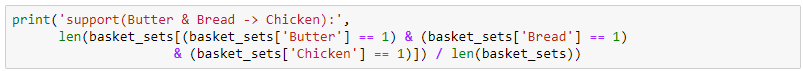

In [6]:
# type the code to get the support of Butter & Bread -> Chicken
print('support(Butter & Bread - > Chicken):',
     len(basket_sets[(basket_sets['Butter'] == 1) & (basket_sets['Bread'] == 1)
                    & (basket_sets['Chicken'] == 1)]) / len(basket_sets))

support(Butter & Bread - > Chicken): 0.2


#### Frequent Itemsets
The Frequent itemsets are transactions that occur a minimum number of times in all the transactions. If you consider a grocery store, they would have millions of transactions in a month - with many different itemsets. We want to eliminate the itemsets which are not purchased frequently - mainly because there wouldn't be enough information on the relationships. We set a threshold for the minimum support for the itemsets to be included of 0.01. 

>`frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)`

In [7]:
# type the code to create the frequent_itemsets variable
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames= True)

### Confidence
Confidence represents the probability of seeing the consequent in a transaction given that the antecedent is already part of the transaction. 

### Lift
Lift measures how much more often the antecedent and consequent appear together than we would expect if they were purchased separately.

### Conviction
A high conviction value means that the consequent is highly dependant on the antecedent. 

If the confidence score is 1, the conviction score will show as _inf_.

To create the model, we will use association_rules using the metric Lift.

>`rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)`  
>`rules.head()`

In [10]:
# type the code to create the model and display the first 5 rows
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Milk),(Chicken),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
1,(Chicken),(Milk),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(Bread),(Butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
3,(Butter),(Bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
4,"(Milk, Butter)",(Bread),0.2,0.8,0.2,1.000000,1.250000,0.04,inf


### Interpreting the Results
Our model used lift as the metric. The value in the lift column explains the assocation between the itemsets. 

---- 

__Lift = 1__: implies the probability of the occurance of the antecedent and the consequent are independent											
__Lift is near to 1__: indicates that X and Y appear together almost as often together as expected											
__Lift >> 1__: shows a dependance on one another. These are the rules for predicting the consequent in future data sets											
__Lift << 1__: indicates that X and Y appear less often together than expected. The occurrence of X has a negative effect on the occurrence of Y											


We returned only the top 5 rows of data. You can view all the results.
>`rules`

In [11]:
# type the code to view the results
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Milk),(Chicken),0.6,0.6,0.4,0.666667,1.111111,0.04,1.200000
1,(Chicken),(Milk),0.6,0.6,0.4,0.666667,1.111111,0.04,1.200000
2,(Bread),(Butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.600000
3,(Butter),(Bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
4,"(Milk, Butter)",(Bread),0.2,0.8,0.2,1.000000,1.250000,0.04,inf
5,(Bread),"(Milk, Butter)",0.8,0.2,0.2,0.250000,1.250000,0.04,1.066667
6,"(Dishsoap, Milk)",(Chicken),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
7,"(Dishsoap, Chicken)",(Milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
8,"(Milk, Chicken)",(Dishsoap),0.4,0.4,0.2,0.500000,1.250000,0.04,1.200000
9,(Dishsoap),"(Milk, Chicken)",0.4,0.4,0.2,0.500000,1.250000,0.04,1.200000


The dataframe allows us to filter the columns to display specific results.

The code is similar to how we would write a SQL query:  
SELECT * FROM rules WHERE rules.lift > 1 AND rules.confidence > .7

>`rules[ (rules['lift'] > 1) & (rules['confidence'] > .7)]`

In [13]:
# type the code to filter the results for lift > 1 and confidence > .7
rules[ (rules['lift'] >1) & (rules['confidence'] > .7)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Bread),(Butter),0.8,0.6,0.6,0.75,1.250000,0.12,1.6
3,(Butter),(Bread),0.6,0.8,0.6,1.00,1.250000,0.12,inf
4,"(Milk, Butter)",(Bread),0.2,0.8,0.2,1.00,1.250000,0.04,inf
6,"(Dishsoap, Milk)",(Chicken),0.2,0.6,0.2,1.00,1.666667,0.08,inf
7,"(Dishsoap, Chicken)",(Milk),0.2,0.6,0.2,1.00,1.666667,0.08,inf
12,"(Chicken, Butter)",(Bread),0.2,0.8,0.2,1.00,1.250000,0.04,inf
14,"(Dishsoap, Bread)",(Butter),0.2,0.6,0.2,1.00,1.666667,0.08,inf
15,"(Dishsoap, Butter)",(Bread),0.2,0.8,0.2,1.00,1.250000,0.04,inf


In [ ]:
# can you run the model using the confidence metric?


Download this completed notebook. 
#### File > Download as > Notebook (.ipynb)